<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ams182/blob/main/segundo%20curso/assignment02_A01104775.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Resumen de actividades semana 4

# Alejandro Munguia Salazar A01104775

# Semana 4: Data Analysis with Python (IBM) 
# Mod 2

Preproceso: acción de mapear o modificar la data cruda para prerparla para ser usada

******************************
Missing values: 
******************************

datos faltantes, Nan, se sugiere:
1.- regresar a la fuente por la info faltante
2.- Si no hay mucho eliminar el registro con la info  
3.- Se puede emplear alguna tecnica para completar la data para no perder info pero es menos preciso por ejemplo con la media, no siempre se puede con las variables categoricas para ellas hay mejoeres técnicas como la moda

dropna() eliminar filas o col con el na, o df.replace() para reemplazarlos

para reemplazar con la media: primero se calcula y luego se reemplaza:

mean = df['col'].mean()
df['col'].replace(np.nan, mean)

4.- o simplemente dejarla como info vacia


******************************
Nomalizacion
******************************

Cunado las variables tienen difernetes escalas pueden provocar que la influencia de estas aumente o disminuya en el modelo, por eso se sugiere que las variables tengan una escala parecida.

1.- simple feature scaling:

x_nueva = x_vieja / max(x_vieja)

2.- min_max:

x_nueva =  ( x_vieja - min(x_vieja) ) / ( max(x_vieja) - min(x_vieja) )

3.- Z-score

x_nueva = ( x_vieja - Media ) / std


******************************
Binning (de numerica a categórica)
******************************

Agrupar una variable para que sea mas facil de leer, por ejemplo en la base el precio de los coches se agrupa en bajo, medio o alto

bins = np.linspace(min(col),max(col),numero_de_bins)

group_names = [ "cat1", "cat2", "cat3"]

df["col_binned"] = pd.cut(df[col],bins,label = group_names, include_lowest= True)

******************************
De categórica a numérica
******************************

La mayoria de los modelos no peuden tomar objetos como entrada, deben ser numericos

pd.get_dummies(df['col'])

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from matplotlib import pyplot


In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

In [4]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.isnull().any() #hay nulos en normalized-losses, num-of-doors, bore, stroke.... y todas con true

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [6]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   
    
#Los true son los datos perdidos 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

***********************************
Entonces en resumen y por hacer:


Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

    "normalized-losses": 41 missing data
    "num-of-doors": 2 missing data
    "bore": 4 missing data
    "stroke" : 4 missing data
    "horsepower": 2 missing data
    "peak-rpm": 2 missing data
    "price": 4 missing data

Deal with missing data
How to deal with missing data?

    Drop data
    a. Drop the whole row
    b. Drop the whole column
    Replace data
    a. Replace it by mean
    b. Replace it by frequency
    c. Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

Replace by mean:

    "normalized-losses": 41 missing data, replace them with mean
    "stroke": 4 missing data, replace them with mean
    "bore": 4 missing data, replace them with mean
    "horsepower": 2 missing data, replace them with mean
    "peak-rpm": 2 missing data, replace them with mean

Replace by frequency:

    "num-of-doors": 2 missing data, replace them with "four".
        Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

Drop the whole row:

    "price": 4 missing data, simply delete the whole row
        Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us



In [7]:
# Aplicando las tareas por hacer

# reemplazando los nan de avg_norm_loss por su media
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

# reemplazando los nan de bore por su media
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

# reemplazando los nan de "stroke" por su media 
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

# reemplazando los nan de horsepower por su media
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

# reemplazando los nan de peak-rpm por su media
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


# Para el caso de Num of doors por el análisis emprico ya que solo hay 2 opciones de manera general en la industria:

#vemos cuantos valores hay, luego de esos cual es el maximo
print("")
print(df['num-of-doors'].value_counts())
print(df['num-of-doors'].value_counts().idxmax())
print("")

# reemplazando los nan de "num-of-doors por el valor mas repetido que es "four"

#df["num-of-doors"].replace(np.nan, "four", inplace=True)

#mejor:

df["num-of-doors"].replace(np.nan, 
                           str(df['num-of-doors'].value_counts().idxmax()), 
                           inplace=True)

# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.head()

Average of normalized-losses: 122.0
Average of bore: 3.3297512437810943
Average of stroke: 3.255422885572139
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079

four    114
two      89
Name: num-of-doors, dtype: int64
four



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


***********************************
Corrigiendo el formato:

In [8]:
#antes de la transformación
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
# transformando
df[["bore", "stroke","price","peak-rpm"]] =  df[["bore", "stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

In [10]:
#despues de la transformación
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

****************************************************************************************************************************************

Data Standardization

La estandarización es el proceso de transformar los datos en un formato común, lo que permite al investigador hacer una comparación significativa.


en este ejemplo, lo convierte a unidades mas entendibles por el investifador

mpg to L/100km: L/100km = 235 / mpg o vicecersa para el caso de la pregunta

In [11]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [12]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


******************
Data Normalization

Igualar el ranfo de variables que sean muy dispares. 

Normalmente con media 0, y varianza 1, o rango entre 0 y 1. 

para este ejemplo, normaliza las columnas "length", "width" and "height"

In [13]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


********************
Binning


Binning es el proceso de transformar variables continuas numericas en categóricas o 'bins' para hacer análisis agrupandolas.   

en el ejemplo, "horsepower" tiene valores entre 48 y 288 con 59 valores unicos. 

en el supuesto caso de que nos interese el precio dado las categorías: 
1.- high horsepower
2.- medium horsepower
3.- little horsepower 

se puede usar linspace(start_value, end_value, numbers_generated y  pd.cut() para crear esos bins

In [14]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

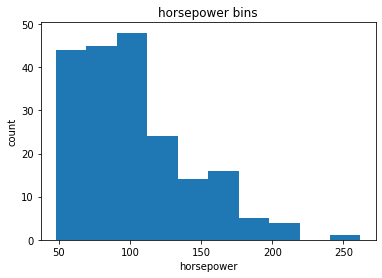

In [15]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [16]:
# Creando los bins, con valor min y val max de la columna y 4 
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
#nombres de las categorias
group_names = ['Low', 'Medium', 'High']
#usando cut en la nueva col para crear la nueva variable con bin
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [17]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

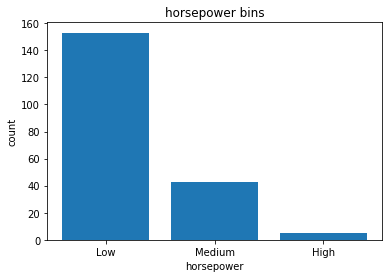

In [18]:
%matplotlib inline
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


Text(0.5, 1.0, 'horsepower bins')

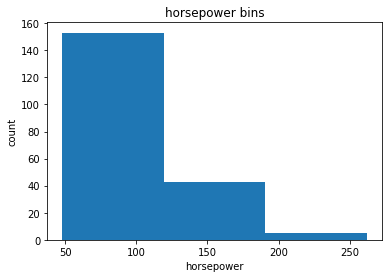

In [19]:
%matplotlib inline
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

***********************
Indicator Variable (or Dummy Variable)

Uso de variables numericas para representar variables categóricas ya que usualmente los modelos no son capaces de usar variables categóricas

en este ejemplo:

 "fuel-type" tiene dos valres: "gas" or "diesel". 
 
una Regresion solo acepta numeros como parametros de entrada asi que lo convertiremos a numérico.

se usa:  pd.get_dummies(col)

lo mismo para las columnas: aspiration
 
 

In [20]:
#creando los dummies para la variable 1


dummy_variable_1 = pd.get_dummies(df["fuel-type"])
#para facilidad renombra esas variables 
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
# uniendolas
df = pd.concat([df, dummy_variable_1], axis=1)

# se elimina la col original
df.drop("fuel-type", axis = 1, inplace=True)


#creando los dummies para la variable 2


dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)



df.head(3)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0


In [21]:
# Aplicando la misma lógica para la variable agrpada de gasolinas.

dummy_variable_3 = pd.get_dummies(df['horsepower-binned'])
dummy_variable_3.rename(columns={'Low':'gas-low', 'Medium': 'gas-medium', 'High':'gas-high'}, inplace=True)
df = pd.concat([df, dummy_variable_3], axis=1)
df.drop('horsepower-binned', axis = 1, inplace=True)



df.head(3)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,gas-low,gas-medium,gas-high
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,13495.0,11.190476,0,1,1,0,1,0,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,16500.0,11.190476,0,1,1,0,1,0,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.038462,16500.0,12.368421,0,1,1,0,0,1,0


In [22]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std',
       'aspiration-turbo', 'gas-low', 'gas-medium', 'gas-high'],
      dtype='object')

In [23]:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,gas-low,gas-medium,gas-high
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,13495.0,11.190476,0,1,1,0,1,0,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,16500.0,11.190476,0,1,1,0,1,0,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.038462,16500.0,12.368421,0,1,1,0,0,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,7.833333,13950.0,9.791667,0,1,1,0,1,0,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,10.681818,17450.0,13.055556,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,8.392857,16845.0,10.217391,0,1,1,0,1,0,0
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,9.400000,19045.0,12.368421,0,1,0,1,0,1,0
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,10.217391,21485.0,13.055556,0,1,1,0,0,1,0
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,8.703704,22470.0,9.038462,1,0,0,1,1,0,0
